In [1]:
import numpy as np

from jax import config
config.update("jax_enable_x64", True)


from matplotlib import pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
klin, plin = np.loadtxt('Pk_Planck15_Table4.txt', unpack=True);

plin *= 0.1

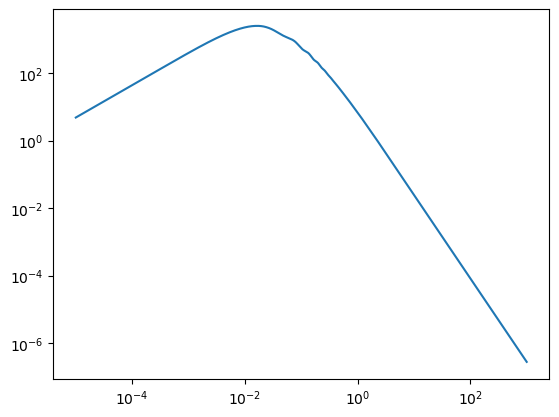

In [3]:
from Utils.loginterp_jax import loginterp_jax

kint = np.logspace(-5,3,2000)
pint = loginterp_jax(klin,plin)(kint)

plt.loglog(kint, pint)

In [4]:
from Utils.spherical_bessel_transform import SphericalBesselTransform as SBT

In [5]:
sph = SBT(kint,fourier=True)

In [6]:
rr, xi0 = sph.sph(0,pint)

(0.0, 200.0)

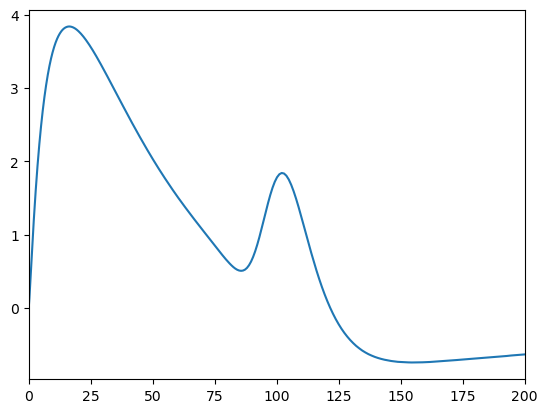

In [7]:
plt.plot(rr, rr**2 * xi0)

plt.xlim(0,200)

In [8]:
from Utils.spherical_bessel_transform_ncol import SphericalBesselTransform as SBTn

In [9]:
sphn = SBTn(kint,ncol=1,fourier=True)

In [10]:
ptest = pint #np.array([pint, pint])

In [11]:
rr, xi0 = sphn.sph(0,ptest)

(0.0, 150.0)

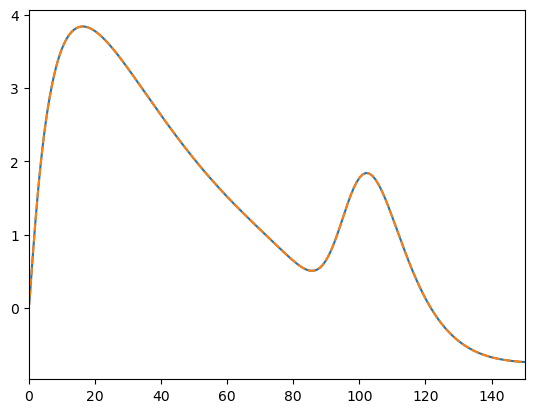

In [12]:
plt.plot(rr, rr**2 * xi0[0,:])
plt.plot(rr, rr**2 * xi0[1,:], '--')

plt.xlim(0,150)

In [13]:
xi0.shape

(1, 2000)

In [14]:
from Utils.qfuncfft_jax import QFuncFFT_JAX

In [15]:
qfunc = QFuncFFT_JAX(kint, pint * np.exp(-(kint/10)**2))

(0.001, 1)

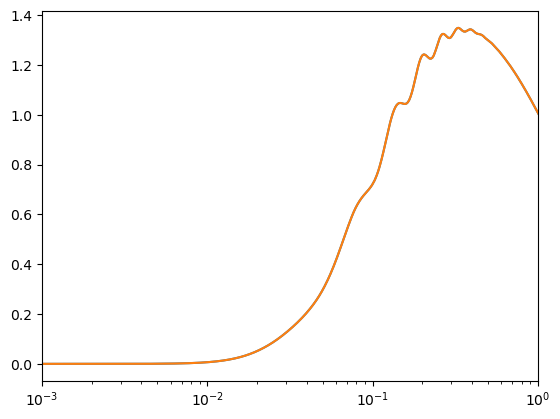

In [16]:
plt.semilogx(qfunc.k, qfunc.k*qfunc.Rb3)
plt.semilogx(qfunc.k, 4/7*qfunc.k*qfunc.R1)

plt.xlim(1e-3,1)

In [17]:
from zenbu import Zenbu

In [18]:
modPT = Zenbu(klin,plin)

In [19]:
modPT.p_integrals(1.0)

DeviceArray([ 8.10358229,  9.27189108, 11.70042748,  3.21230496,
              6.61745806, 11.62587183, -0.25788497, -0.61029976,
              0.43914569,  1.04485674,  8.10358229], dtype=float64)

In [22]:
modPT.make_ptable()

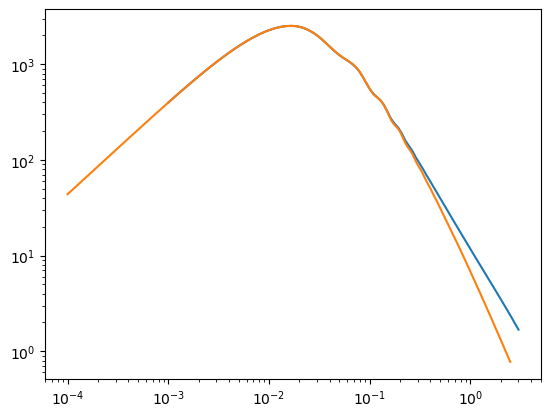

In [27]:
plt.loglog(modPT.pktable[:,0], modPT.pktable[:,3])

plt.loglog(klin, plin)